Licensed under the MIT License.

Copyright (c) 2021-2031. All rights reserved.

# Lotus Queen - Outlier Plot

* How to convert an image to a matplot marker
  * Find a `.png` format image that you want to use as the marker
  * Convert `.png` image to `.svg` image through an [online converter][2]
  * Parse the path string using `minidom` as my code below shows
  * Then use `parse_path()` from `svgpath2mpl` will get the marker output
 
[1]:https://inkscape.org/release/inkscape-1.3.2/windows/64-bit/msi/?redirected=1
[2]:https://www.freeconvert.com/png-to-svg

In [1]:
from svgpath2mpl import parse_path
import matplotlib.pyplot as plt       
import pandas as pd
import numpy as np
from xml.dom import minidom

#### Parse Path String from SVG Image

In [10]:
doc = minidom.parse('lotus.svg')
path_strings = [path.getAttribute('d') for path
                in doc.getElementsByTagName('path')]
doc.unlink()

path_strings

['M943 1468 c-40 -43 -107 -135 -127 -175 l-16 -32 -55 34 c-67 40 -199 90 -218 82 -22 -8 -38 -82 -44 -208 l-6 -116 -81 -7 c-104 -9 -166 -25 -166 -43 0 -26 42 -138 76 -204 115 -218 315 -314 584 -279 71 9 114 9 194 0 136 -16 247 -2 343 45 89 43 141 89 201 179 49 74 117 238 108 262 -7 18 -65 32 -163 40 l-83 7 0 78 c0 83 -23 226 -40 243 -14 14 -108 -17 -202 -67 -43 -22 -79 -39 -81 -36 -2 2 -19 29 -38 59 -46 74 -127 170 -142 170 -7 0 -27 -15 -44 -32z m100 -86 c24 -31 55 -76 68 -99 l24 -42 -51 -53 c-28 -29 -63 -70 -77 -92 l-25 -38 -16 30 c-9 17 -41 57 -71 90 -30 33 -55 64 -55 69 0 31 135 207 151 198 5 -3 28 -32 52 -63z m-355 -104 c46 -22 86 -46 88 -52 3 -7 -3 -32 -11 -56 -9 -25 -19 -78 -22 -117 -3 -40 -8 -73 -10 -73 -2 0 -18 7 -34 16 -17 8 -63 23 -102 33 l-72 19 -3 73 c-2 41 2 105 9 142 l11 69 32 -6 c17 -4 69 -25 114 -48z m752 -30 c6 -46 10 -110 8 -143 l-3 -59 -62 -13 c-34 -7 -80 -21 -102 -33 -22 -11 -43 -20 -46 -20 -3 0 -5 20 -5 43 0 24 -9 79 -20 122 -11 43 -20 79 -20 81 0 6 99 59 149 80 87 

#### Generate Example Outlier Data & Plot

In [73]:
n = 18
time_mean = 10
time_std = 2.5
month_mean = 7
month_std = 1

normal_lotus_time = np.random.normal(time_mean, time_std, n)
normal_lotus_month = np.random.normal(month_mean, month_std, n)

print(min(normal_lotus_time), max(normal_lotus_time))
print(min(normal_lotus_month), max(normal_lotus_month))

lotus_df = pd.DataFrame({'open_time': normal_lotus_time, 'open_month':normal_lotus_month})
lotus_df.loc[len(lotus_df)] = [22, 12]  # create 1 outlier ;)

lotus_df.tail()

6.590429704098659 14.634620913866307
4.730082413075134 8.576997515562896


,open_time,open_month
14,6.651084,8.576998
15,9.714133,7.821988
16,7.966652,6.556630
17,7.758615,6.018660
18,22.000000,12.000000


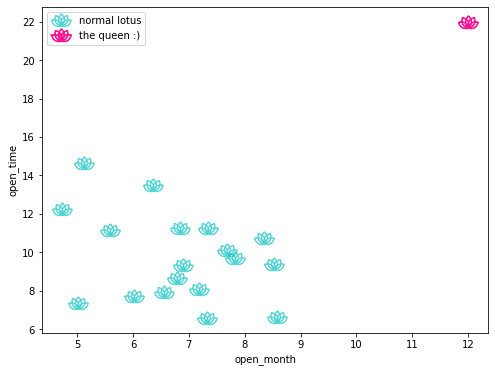

In [74]:
plt.figure(figsize=(8, 6))
lotus = parse_path(path_strings[0])
lotus.vertices -= lotus.vertices.mean(axis=0)         
plt.plot(lotus_df['open_month'].values[:-1], lotus_df['open_time'].values[:-1], marker=lotus, markersize=20, color='c', alpha=0.5, label='normal lotus', linestyle='None')
plt.plot(lotus_df['open_month'].values[-1], lotus_df['open_time'].values[-1], marker=lotus, markersize=20, color='deeppink', label='the queen :)')
plt.xlabel('open_month')
plt.ylabel('open_time')
plt.legend()
plt.show()